In [2]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set(style="whitegrid")

def enhanced_plot(epochs, train_losses, val_losses):
    plt.figure(figsize=(6, 3))
    plt.plot(epochs, train_losses, color='blue', linewidth=2, label='Training Loss')
    plt.plot(epochs, val_losses, color='dodgerblue', linewidth=2, label='Validation Loss')
    plt.yscale("log")  # Use logarithmic scale to handle small values properly
    plt.title("Loss over Epochs", fontsize=14, fontfamily='sans-serif')
    plt.xlabel("Epoch", fontsize=12, fontfamily='sans-serif')
    plt.ylabel("Loss (Log Scale)", fontsize=12, fontfamily='sans-serif')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Read the log file
def parse_loss_from_log(file_path):
    with open(file_path, 'r') as file:
        log_lines = file.readlines()

    epochs = []
    train_losses = []
    val_losses = []

    for line in log_lines:
        match = re.search(r"Epoch (\d+)/\d+", line)
        if match:
            epochs.append(int(match.group(1)))

        match = re.search(r"loss: ([0-9.eE+-]+) - val_loss: ([0-9.eE+-]+)", line)
        if match:
            train_losses.append(float(match.group(1)))
            val_losses.append(float(match.group(2)))

    return epochs, train_losses, val_losses

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
[0.1673, 0.0483, 0.0414, 0.0371, 0.0326, 0.0297, 0.0267, 0.0243, 0.0225, 0.0209, 0.0185, 0.0179, 0.0162, 0.0153, 0.0138, 0.0131, 0.0122, 0.0109, 0.0105, 0.0103, 0.0091, 0.0085, 0.008, 0.0075, 0.0071, 0.0066, 0.0062, 0.0058, 0.0053, 0.0053, 0.0048, 0.0046, 0.0043, 0.0038, 0.0037, 0.0035, 0.0034, 0.0031, 0.0029, 0.0029, 0.0025, 0.0025, 0.0023, 0.0021, 0.002, 0.0019, 0.0018, 0.0017]
[0.4369, 0.0397, 0.0173, 0.0157, 0.0138, 0.013, 0.0124, 0.0111, 0.0107, 0.009, 0.0084, 0.0073, 0.0073, 0.0058, 0.0053, 0.0052, 0.005, 0.0047, 0.004, 0.0042, 0.0033, 0.0035, 0.0027, 0.0029, 0.0027, 0.002, 0.0026, 0.0016, 0.0019, 0.0015, 0.0015, 0.001, 0.0011, 0.00075014, 0.00090452, 0.00066456, 0.0007516

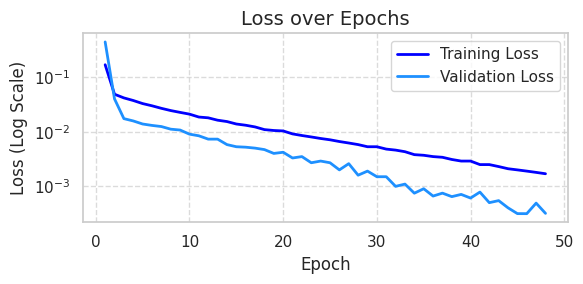

In [3]:
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/MSCS/DL/DL_medGAN_project/stats/history_m_fit.txt"

# Example usage
epochs, train_losses, val_losses = parse_loss_from_log(file_path)
print(epochs)
print(train_losses)
print(val_losses)

enhanced_plot(epochs, train_losses, val_losses)

In [4]:
batch_metrics_a = "/content/drive/MyDrive/MSCS/DL/DL_medGAN_project/logs/baseline/batch_metrics.csv"
epoch_metrics_a = "/content/drive/MyDrive/MSCS/DL/DL_medGAN_project/logs/baseline/epoch_metrics.csv"

batch_metrics_m = "/content/drive/MyDrive/MSCS/DL/DL_medGAN_project/logs/medganx/batch_metrics.csv"
epoch_metrics_m = "/content/drive/MyDrive/MSCS/DL/DL_medGAN_project/logs/medganx/epoch_metrics.csv"

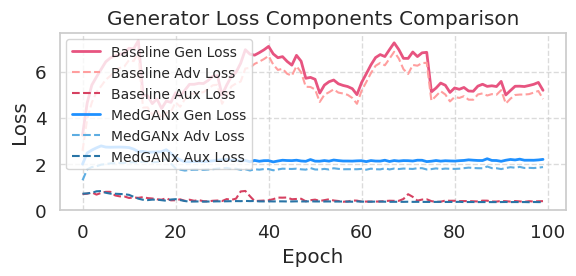

In [5]:
import seaborn as sns
import pandas as pd

# Set Seaborn style
sns.set_theme(style="whitegrid", font_scale=1.2, font="sans-serif")

# Load data
epoch_df_a = pd.read_csv(epoch_metrics_a)
epoch_df_m = pd.read_csv(epoch_metrics_m)

# 1. Generator Loss Components Comparison
plt.figure(figsize=(6, 3))
plt.plot(epoch_df_a['step'], epoch_df_a['g_loss'], label='Baseline Gen Loss', color='#e75480', linewidth=2)
plt.plot(epoch_df_a['step'], epoch_df_a['g_adv_loss'], label='Baseline Adv Loss', color='#ff9e9e', linestyle='--')
plt.plot(epoch_df_a['step'], epoch_df_a['g_aux_loss'], label='Baseline Aux Loss', color='#d64161', linestyle='--')
plt.plot(epoch_df_m['step'], epoch_df_m['g_loss'], label='MedGANx Gen Loss', color='#1e90ff', linewidth=2)
plt.plot(epoch_df_m['step'], epoch_df_m['g_adv_loss'], label='MedGANx Adv Loss', color='#5dade2', linestyle='--')
plt.plot(epoch_df_m['step'], epoch_df_m['g_aux_loss'], label='MedGANx Aux Loss', color='#2874a6', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Generator Loss Components Comparison')
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

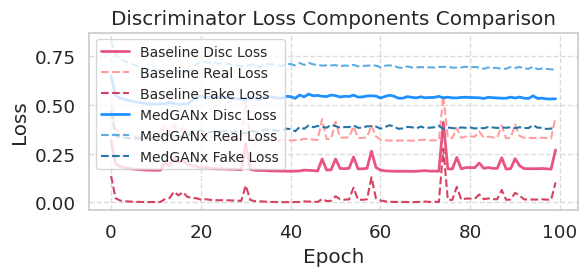

In [7]:
# 2. Discriminator Loss Components Comparison
plt.figure(figsize=(6, 3))
plt.plot(epoch_df_a['step'], epoch_df_a['d_loss'], label='Baseline Disc Loss', color='#e75480', linewidth=2)
plt.plot(epoch_df_a['step'], epoch_df_a['d_real_loss'], label='Baseline Real Loss', color='#ff9e9e', linestyle='--')
plt.plot(epoch_df_a['step'], epoch_df_a['d_fake_loss'], label='Baseline Fake Loss', color='#d64161', linestyle='--')
plt.plot(epoch_df_m['step'], epoch_df_m['d_loss'], label='MedGANx Disc Loss', color='#1e90ff', linewidth=2)
plt.plot(epoch_df_m['step'], epoch_df_m['d_real_loss'], label='MedGANx Real Loss', color='#5dade2', linestyle='--')
plt.plot(epoch_df_m['step'], epoch_df_m['d_fake_loss'], label='MedGANx Fake Loss', color='#2874a6', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Discriminator Loss Components Comparison')
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

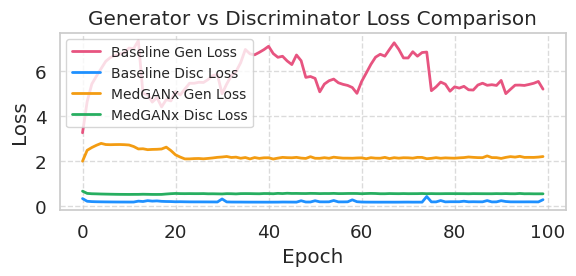

In [9]:
# 3. Generator vs Discriminator Loss Comparison
plt.figure(figsize=(6, 3))
plt.plot(epoch_df_a['step'], epoch_df_a['g_loss'], label='Baseline Gen Loss', color='#e75480', linewidth=2)
plt.plot(epoch_df_a['step'], epoch_df_a['d_loss'], label='Baseline Disc Loss', color='#1e90ff', linewidth=2)
plt.plot(epoch_df_m['step'], epoch_df_m['g_loss'], label='MedGANx Gen Loss', color='#f39c12', linewidth=2)
plt.plot(epoch_df_m['step'], epoch_df_m['d_loss'], label='MedGANx Disc Loss', color='#27ae60', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Generator vs Discriminator Loss Comparison')
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

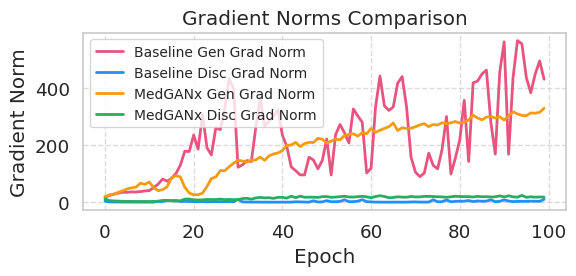

In [10]:
# 4. Gradient Norms Comparison
plt.figure(figsize=(6, 3))
plt.plot(epoch_df_a['step'], epoch_df_a['g_grad_norm'], label='Baseline Gen Grad Norm', color='#e75480', linewidth=2)
plt.plot(epoch_df_a['step'], epoch_df_a['d_grad_norm'], label='Baseline Disc Grad Norm', color='#1e90ff', linewidth=2)
plt.plot(epoch_df_m['step'], epoch_df_m['g_grad_norm'], label='MedGANx Gen Grad Norm', color='#f39c12', linewidth=2)
plt.plot(epoch_df_m['step'], epoch_df_m['d_grad_norm'], label='MedGANx Disc Grad Norm', color='#27ae60', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norms Comparison')
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

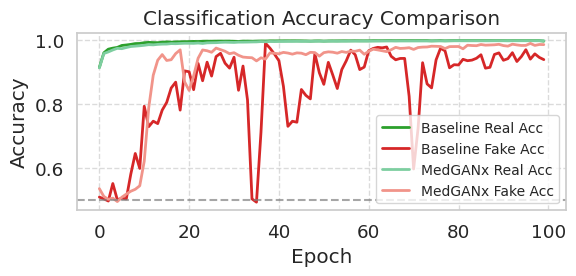

In [11]:
# 5. Classification Accuracy Comparison
plt.figure(figsize=(6, 3))
plt.plot(epoch_df_a['step'], epoch_df_a['real_accuracy'], label='Baseline Real Acc', color='#2ca02c', linewidth=2)
plt.plot(epoch_df_a['step'], epoch_df_a['fake_accuracy'], label='Baseline Fake Acc', color='#d62728', linewidth=2)
plt.plot(epoch_df_m['step'], epoch_df_m['real_accuracy'], label='MedGANx Real Acc', color='#7dcea0', linewidth=2)
plt.plot(epoch_df_m['step'], epoch_df_m['fake_accuracy'], label='MedGANx Fake Acc', color='#f1948a', linewidth=2)
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Classification Accuracy Comparison')
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

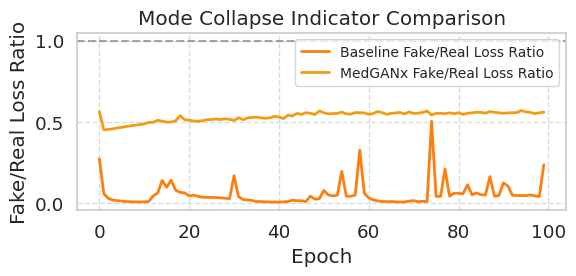

In [12]:
# 6. Mode Collapse Indicator Comparison
plt.figure(figsize=(6, 3))
loss_ratio_a = epoch_df_a['d_fake_loss'] / epoch_df_a['d_real_loss']
loss_ratio_m = epoch_df_m['d_fake_loss'] / epoch_df_m['d_real_loss']
plt.plot(epoch_df_a['step'], loss_ratio_a, label='Baseline Fake/Real Loss Ratio', color='#ff7f0e', linewidth=2)
plt.plot(epoch_df_m['step'], loss_ratio_m, label='MedGANx Fake/Real Loss Ratio', color='#f39c12', linewidth=2)
plt.axhline(y=1.0, color='gray', linestyle='--', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('Fake/Real Loss Ratio')
plt.title('Mode Collapse Indicator Comparison')
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()